In [14]:
import pandas as pd 
import numpy as np
import datetime 
from datetime import datetime
import seaborn as sns 

import matplotlib.pyplot as plt

#### Things we're looking into: 
1. When were the growth spurts? (Compare BF sessions - duration between sessions, length of sessions) 
2. Number of diapers and correlation with BF sessions
3. Does more sleep in the day beget more sleep at night? 
4. Sleep patterns to establish a sleep pattern 
5. Feeding patterns to establish a feeding pattern 

In [2]:
# !pip install --upgrade matplotlib

In [26]:
aadi_data= pd.read_csv('export_narababy_aadi_20221222.csv',error_bad_lines=False, skiprows= 0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
aadi_data.columns

Index(['Type', 'Profile Name', 'Start Date/time', 'Start Date/time (Epoch)',
       'Created By Caregiver', 'Last Updated By Caregiver', 'Note',
       'Time Zone', '[Sleep] Duration (Seconds)', '[Sleep] End Date/time',
       '[Sleep] End Date/time (Epoch)', '[Breastfeed] Begin Side',
       '[Breastfeed] End Side', '[Breastfeed] Left Duration (Seconds)',
       '[Breastfeed] Right Duration (Seconds)', '[Diaper] Type',
       '[Diaper] Detail', '[Diaper] Dirty Color', '[Diaper] Dirty Texture',
       '[Growth] Head Size', '[Growth] Head Size Unit', '[Growth] Height',
       '[Growth] Height Unit', '[Growth] Weight', '[Growth] Weight Unit',
       '[Routine] Routine', '[Pump] Duration (Seconds)',
       '[Pump] End Date/time', '[Pump] End Date/time (Epoch)',
       '[Pump] Left Volume', '[Pump] Left Volume Unit', '[Pump] Right Volume',
       '[Pump] Right Volume Unit', '[Pump] Total Volume',
       '[Pump] Total Volume Unit', '[Bottle Feed] Type',
       '[Bottle Feed] Breast Milk Vol

In [29]:
DoB= datetime(2022, 10, 17, 19, 50, 15)  
aadi_data['Start Date/time']=pd.to_datetime(aadi_data['Start Date/time'])
aadi_data['Age']= aadi_data['Start Date/time']- DoB # adding age into the dataframe

aadi_data = aadi_data.sort_values('Start Date/time', ascending=True)

In [31]:
aadi_data.Type.unique()

array(['Vaccine', 'Growth', 'Breastfeed', 'Diaper', 'Routine',
       'Bottle Feed', 'Sleep', 'Pump', 'Profile'], dtype=object)

In [35]:
sleep_df= aadi_data[aadi_data.Type=='Sleep'].reset_index()
sleep_df.columns

Index(['index', 'Type', 'Profile Name', 'Start Date/time',
       'Start Date/time (Epoch)', 'Created By Caregiver',
       'Last Updated By Caregiver', 'Note', 'Time Zone',
       '[Sleep] Duration (Seconds)', '[Sleep] End Date/time',
       '[Sleep] End Date/time (Epoch)', '[Breastfeed] Begin Side',
       '[Breastfeed] End Side', '[Breastfeed] Left Duration (Seconds)',
       '[Breastfeed] Right Duration (Seconds)', '[Diaper] Type',
       '[Diaper] Detail', '[Diaper] Dirty Color', '[Diaper] Dirty Texture',
       '[Growth] Head Size', '[Growth] Head Size Unit', '[Growth] Height',
       '[Growth] Height Unit', '[Growth] Weight', '[Growth] Weight Unit',
       '[Routine] Routine', '[Pump] Duration (Seconds)',
       '[Pump] End Date/time', '[Pump] End Date/time (Epoch)',
       '[Pump] Left Volume', '[Pump] Left Volume Unit', '[Pump] Right Volume',
       '[Pump] Right Volume Unit', '[Pump] Total Volume',
       '[Pump] Total Volume Unit', '[Bottle Feed] Type',
       '[Bottle Feed]

In [36]:
sleep_df= aadi_data[aadi_data.Type=='Sleep'].reset_index()[['Start Date/time', 
                                                            'Start Date/time (Epoch)', \
                                                            '[Sleep] Duration (Seconds)',\
                                                            '[Sleep] End Date/time',]] 


In [41]:
bf_df= aadi_data[aadi_data.Type=='Breastfeed'].reset_index()[['Start Date/time', 
                                            'Start Date/time (Epoch)', \
                                            '[Breastfeed] Begin Side',\
                                           '[Breastfeed] End Side', \
                                           '[Breastfeed] Left Duration (Seconds)',\
                                            '[Breastfeed] Right Duration (Seconds)','Age']]

bf_df['totalFeedMins']= (bf_df['[Breastfeed] Left Duration (Seconds)'].fillna(0)+ 
                         bf_df['[Breastfeed] Right Duration (Seconds)'].fillna(0))/60

In [42]:
bf_df.columns

Index(['Start Date/time', 'Start Date/time (Epoch)', '[Breastfeed] Begin Side',
       '[Breastfeed] End Side', '[Breastfeed] Left Duration (Seconds)',
       '[Breastfeed] Right Duration (Seconds)', 'Age', 'totalFeedMins'],
      dtype='object')

In [43]:
# Calculating time difference between feeds
bf_timedelta=np.abs(np.diff(bf_df['Start Date/time']))/ np.timedelta64(1, 'm') # time difference in minutes
bf_timedelta= np.insert(bf_timedelta, 0, 0)
bf_df['MinutesBetweenFeeds']= bf_timedelta
bf_df['Age_days']= bf_df['Age'].dt.days/7



In [17]:

# # ax.xaxis.set_major_formatter(day_month_formatter)
# bf_df.plot.scatter(x='Age',
#                 y='MinutesBetweenFeeds',
#                 c='DarkBlue')
# plt.xticks(rotation = 90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

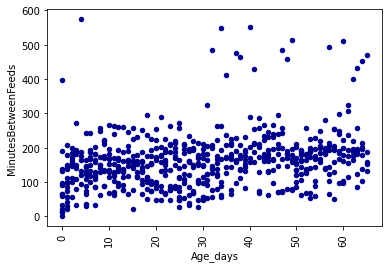

In [44]:

bf_df.plot.scatter(x='Age_days',
                y='MinutesBetweenFeeds',
                c='DarkBlue')

plt.xticks(rotation = 90)

In [154]:
bf_df_diff= bf_df[['Age_days', 'MinutesBetweenFeeds','totalFeedMins' ]]
# bf_df_diff.Age_days.unique()

# bf_df_diff.groupby('Age_days').count()

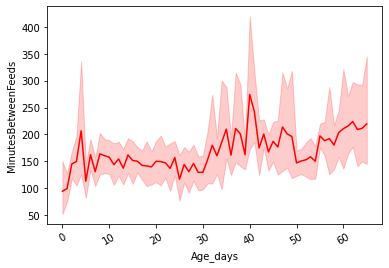

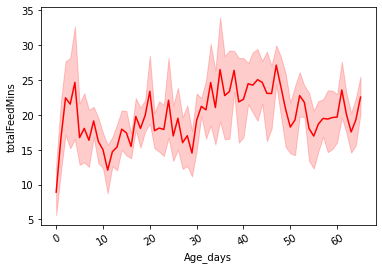

In [45]:
for y_axis in ["MinutesBetweenFeeds","totalFeedMins"]: 
    sns.lineplot(x = "Age_days", y = y_axis , 
                 color = 'r', data = bf_df)
    plt.xticks(rotation=30)
    plt.show()


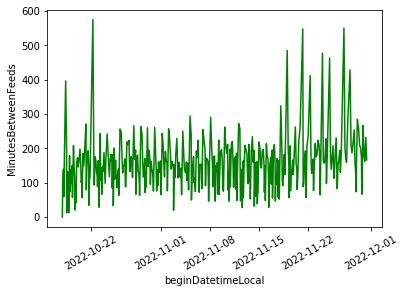

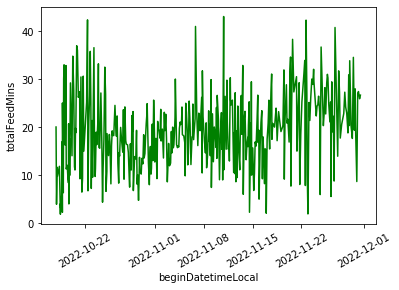

In [157]:
for y_axis in ["MinutesBetweenFeeds","totalFeedMins"]: 
    sns.lineplot(x = "beginDatetimeLocal", y = y_axis , 
                 color = 'g', data = bf_df)
    plt.xticks(rotation=30)
    plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3d5374f10>,
      dtype=object)

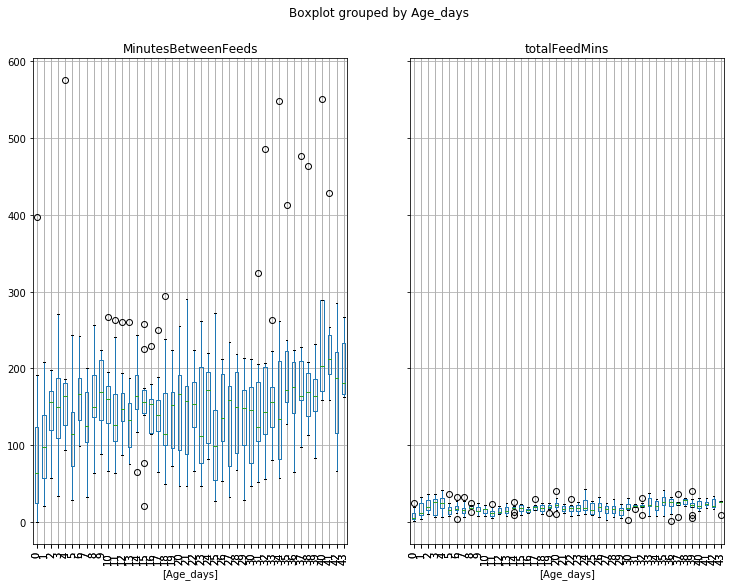

In [139]:

bf_df_diff.boxplot(by='Age_days', figsize=(12, 9), rot=90)
